# GSS EDA - "General Social Survey" data

Datacamp "Exploratory Data Analysis in Python" course from Allen Downey

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [2]:
# Read the data into a pandas dataframe
gss = pd.read_hdf('data/gss.hdf5', 'gss')

In [3]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


(array([  182.,   397.,   669.,  1702.,  4384.,  6683., 24550.,  9816.,
         9744.,  4177.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

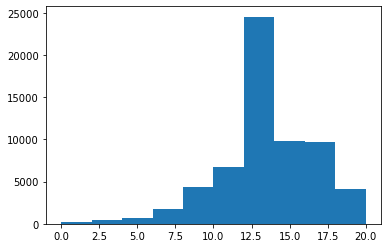

In [4]:
# Focusing on gss['educ'] which is the # years of education - let's look at the histogram
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')

The histogram has limitations. Specifically it bins values so we can see finer patterns. In order to address this we can use a "Probability Mass Function" (developed by Allen Downey and distributed as a Pmf class in the package empiricaldist

In [5]:
# Compute the PMF for the year column
year = gss['year']
pmf_year = Pmf(year)

In [6]:
print(pmf_year.head())

0    1972
1    1972
2    1972
Name: , dtype: int64


(array([7590., 4530., 6466., 6307., 4495., 8728., 5582., 7322., 4067.,
        7379.]),
 array([1972. , 1976.4, 1980.8, 1985.2, 1989.6, 1994. , 1998.4, 2002.8,
        2007.2, 2011.6, 2016. ]),
 <BarContainer object of 10 artists>)

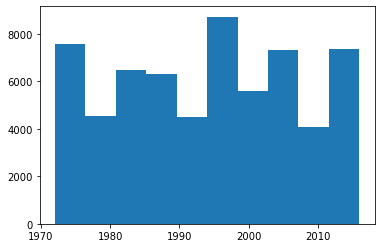

In [7]:
plt.hist(pmf_year.dropna(), label='year')

In [8]:
#pmf_year.bar()

In [9]:
age = gss['age']

In [10]:
pmf_age = Pmf(age)

In [11]:
pmf_age.head()

,probs
0,26.0
1,38.0
2,57.0


<AxesSubplot:>

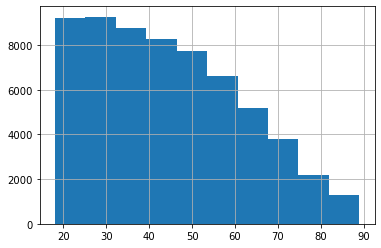

In [12]:
pmf_age.hist()

In [13]:
cdf = Cdf(gss['age'])

<AxesSubplot:>

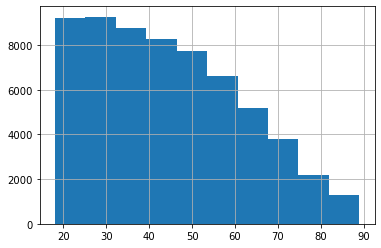

In [14]:
cdf.hist()

In [15]:
q = 51
p = cdf(q)
print(p)

53.0


In [16]:
cdf.head()

,probs
0,26.0
1,38.0
2,57.0


In [17]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

In [18]:
male.shape

(62466,)

Text(0, 0.5, 'Count')

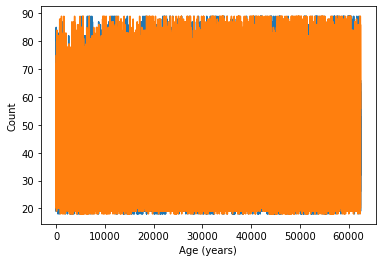

In [19]:
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [20]:
print(male_age.head())

0    26.0
2    57.0
4    59.0
5    46.0
8    85.0
Name: age, dtype: float64


In [21]:
male.head()

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

In [22]:
sample = np.random.normal(size=1000)

<AxesSubplot:>

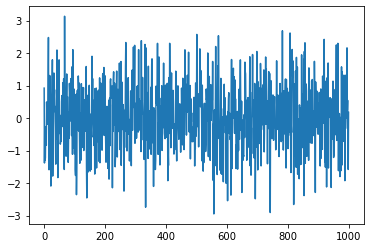

In [23]:
Cdf(sample).plot()

<AxesSubplot:>

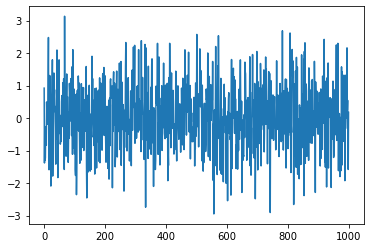

In [24]:
Pmf(sample).plot()

In [25]:
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

In [26]:
# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

In [27]:
# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

In [28]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

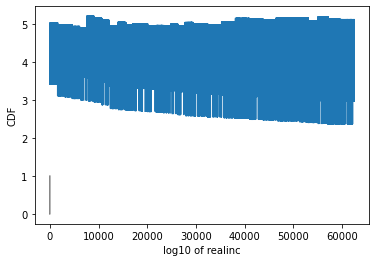

In [29]:
# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()